<a href="https://colab.research.google.com/github/vincewang7/BTC2120_FinalProject/blob/main/BTC2120_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
## Module Import

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import re


from sklearn.preprocessing import scale
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Importing Data

In [ ]:
#cvd_df = pd.DataFrame([])

#pd.read_csv on colab has a row limit of 10,000, so we can rerun this code in an IDE like anaconda
cvd_df = pd.read_csv('CVD_cleaned.csv', nrows = 9980)

#Inputting the dependent variable as the last column in the dataframe
cvd_df['Heart_Disease'] = cvd_df.pop('Heart_Disease')

cvd_df

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12,No
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4,Yes
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16,No
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8,Yes
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,Good,Within the past year,Yes,No,No,No,No,No,Female,30-34,163,52.16,19.74,No,0,30,14,0,No
9976,Fair,Within the past year,No,No,No,Yes,No,Yes,Female,55-59,163,71.21,26.95,Yes,0,0,6,10,No
9977,Excellent,Within the past year,Yes,No,No,No,No,No,Male,40-44,191,100.24,27.62,No,3,90,5,7,No
9978,Good,Within the past 5 years,No,No,No,No,No,No,Male,18-24,183,95.00,28.37,No,3,15,30,15,No


Exploratory Data Analysis and Visualization

In [ ]:
cvd_df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000
mean,170.654409,83.671712,28.653261,5.036273,28.651102,14.815431,6.170842
std,10.622536,21.093383,6.507882,8.493396,24.547328,14.541639,8.467996
min,122.000000,32.660000,13.310000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.240000,0.000000,12.000000,4.000000,1.000000
50%,170.000000,81.650000,27.460000,0.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.822500,5.000000,30.000000,20.000000,8.000000
max,229.000000,235.870000,89.100000,30.000000,120.000000,120.000000,120.000000


In [ ]:
cvd_df.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12,No
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4,Yes
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16,No
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8,Yes
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0,No


Encoding numerical values to categorical values

*   Exercise: 1 = Yes; 0 = No
*   Skin_Cancer: 1 = Yes; 0 = No
*   Other_Cancer: 1 = Yes; 0 = No
*   Depression: 1 = Yes; 0 = No
*   Arthritis: 1 = Yes; 0 = No
*   Sex: 1 = Male; 0 = Female
*   Age_Category: 12 = 80+; 11 = 75-79;10 = 70-74; 9 = 65-69; 8 = 60-64; 7 = 55-59; 6 = 50-54; 5 = 45-49; 4 = 40-44; 3 = 35-39; 2 = 30-34; 1 = 25-29; 0 = 18-24
*   Smoking_History: 1 = Yes; 0 = No
*   Heart_Disease: 1 = Yes; 0 = No
*   Diabetes: 1 = Yes; 0 = No

The Checkup variable was omitted due to imbalanced classes and lack of interpretability for our analysis

General_Health was coded as 5 levels
*   Poor = 0
*   Fair = 1
*   Good = 2
*   Very Good = 3
*   Excellent = 4

In [ ]:
#Categories that require specific encoding orders
#oe_generalHealth = OrdinalEncoder(categories = [['Poor','Fair','Good','Very Good', 'Excellent']])
#oe_checkup = OrdinalEncoder(categories = [['Never','5 or more years ago','Within the past 5 years','Within the past 2 years', 'Within the past year']])

#Categories that don't require specific encoding orders
cat_cols = ['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History', 'Heart_Disease']

def func_labelencoder(list1,features):
    le = LabelEncoder()
    features[list1] = le.fit_transform(features[list1].astype(str))


cvd_df2 = cvd_df

#cvd_df2[['General_Health']] = oe_generalHealth.fit_transform(cvd_df2[['General_Health']].astype(str))
#cvd_df2[['Checkup']] = oe_checkup.fit_transform(cvd_df2[['Checkup']].astype(str))

for i in cat_cols:
    func_labelencoder(i,cvd_df2)

def translate_general_health(health_series):
    # Dictionary mapping string labels to numerical values
    health_translation = {
        "Poor": 0,
        "Fair": 1,
        "Good": 2,
        "Very Good": 3,
        "Excellent": 4
    }

    # Apply the translation to each element in the Series
    return health_series.apply(lambda x: health_translation.get(x, None))

cvd_df2["General_Health"] = translate_general_health(cvd_df["General_Health"])



def translate_checkup(checkup_series):
    # Dictionary mapping string labels to numerical values
    checkup_translation = {
        "Never": 0,
        "5 or more years ago": 1,
        "Within the past 5 years": 2,
        "Within the past 2 years": 3,
        "Within the past year": 4
    }

    # Apply the translation to each element in the Series
    return checkup_series.apply(lambda x: checkup_translation.get(x, None))

cvd_df2["Checkup"] = translate_checkup(cvd_df["Checkup"])



def translate_diabetes(diabetes_series):
    # Function to apply regex matching and translation
    def regex_translate(value):
        # Using regex to search for "Yes" or "No", ignoring case
        if re.search("Yes", value, re.IGNORECASE):
            return 1
        elif re.search("No", value, re.IGNORECASE):
            return 0
        else:
            return None

    return diabetes_series.apply(regex_translate)

cvd_df2["Diabetes"] = translate_diabetes(cvd_df["Diabetes"])


In [ ]:
cvd_df2.head(10)

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,0,3,0,0,0,0,0,1,0,10,150,32.66,14.54,1,0,30,16,12,0
1,3,4,0,0,0,0,1,0,0,10,165,77.11,28.29,0,0,30,0,4,1
2,3,4,1,0,0,0,1,0,0,8,163,88.45,33.47,0,4,12,3,16,0
3,0,4,1,0,0,0,1,0,1,11,180,93.44,28.73,0,0,30,30,8,1
4,2,4,0,0,0,0,0,0,1,12,191,88.45,24.37,1,0,8,4,0,0
5,2,4,0,0,0,1,0,1,1,8,183,154.22,46.11,0,0,12,12,12,0
6,1,4,1,0,0,0,0,1,1,8,175,69.85,22.74,1,0,16,8,0,1
7,2,4,1,0,0,0,0,1,0,9,165,108.86,39.94,1,3,30,8,8,0
8,1,4,0,0,0,1,0,0,0,9,163,72.57,27.46,1,0,12,12,4,0
9,1,4,0,0,0,0,1,1,0,10,163,91.63,34.67,0,0,12,12,1,0


In [ ]:
#cvd_df2['Exercise'] = cvd_df2['Exercise'].astype('category')

In [ ]:
cvd_df2.describe()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
count,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.00000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000
mean,2.456313,3.560922,0.748497,0.117034,0.106413,0.183667,0.144890,0.355912,0.457916,6.96984,170.654409,83.671712,28.653261,0.431864,5.036273,28.651102,14.815431,6.170842,0.090782
std,1.051340,0.874415,0.433899,0.321477,0.308381,0.387232,0.352007,0.478813,0.498251,3.48222,10.622536,21.093383,6.507882,0.495361,8.493396,24.547328,14.541639,8.467996,0.287313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,122.000000,32.660000,13.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,163.000000,68.040000,24.240000,0.000000,0.000000,12.000000,4.000000,1.000000,0.000000
50%,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.00000,170.000000,81.650000,27.460000,0.000000,0.000000,30.000000,12.000000,4.000000,0.000000
75%,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.00000,178.000000,95.250000,31.822500,1.000000,5.000000,30.000000,20.000000,8.000000,0.000000
max,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.00000,229.000000,235.870000,89.100000,1.000000,30.000000,120.000000,120.000000,120.000000,1.000000


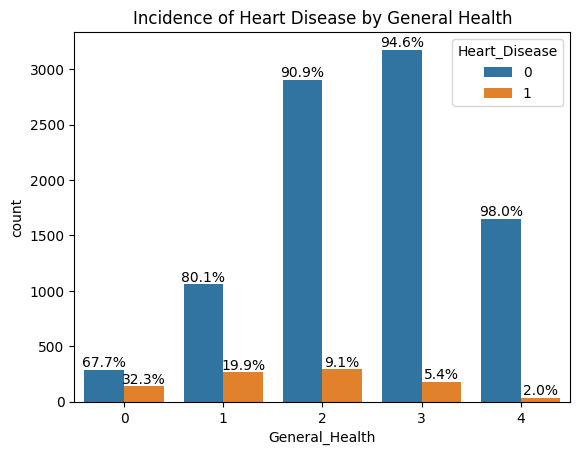

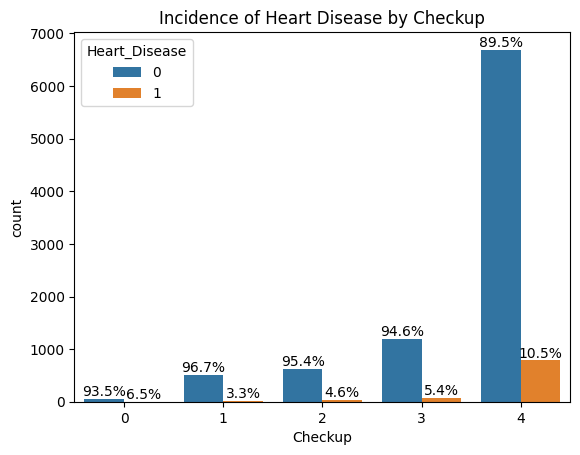

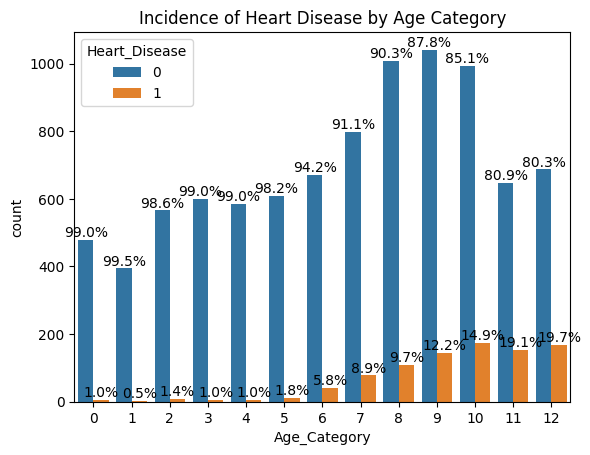

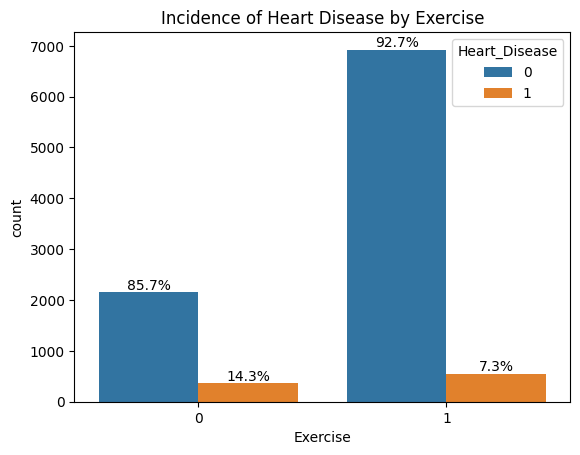

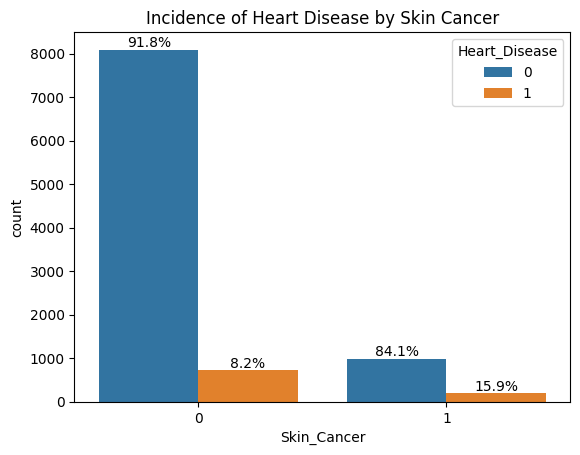

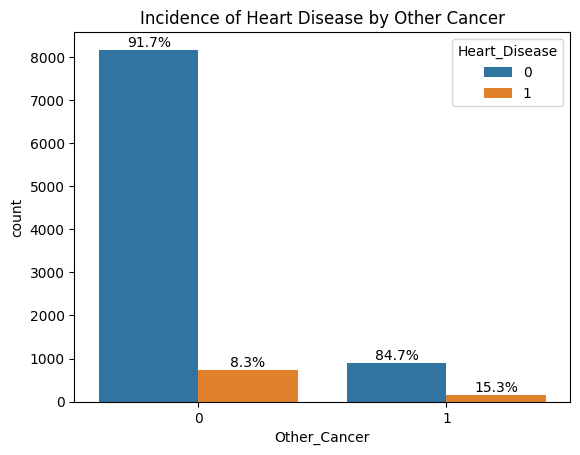

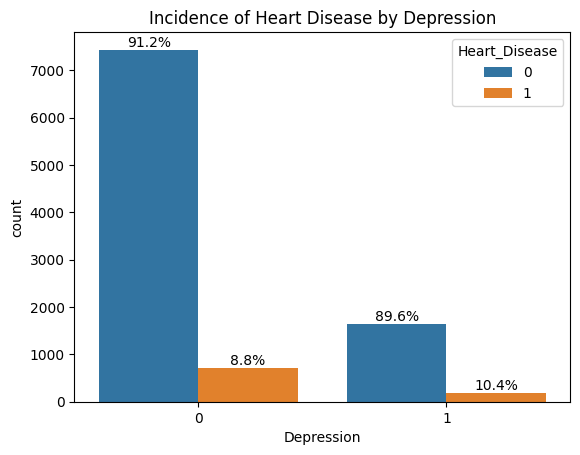

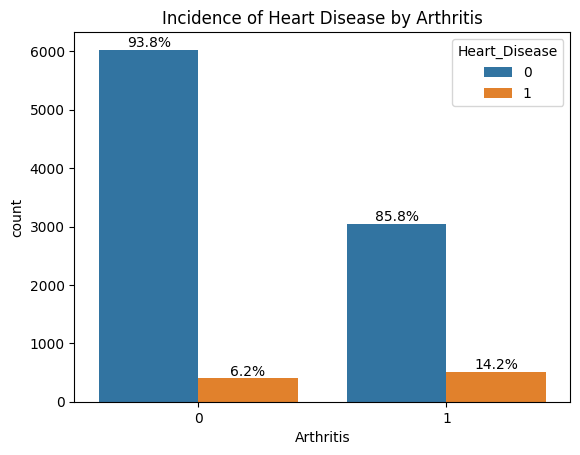

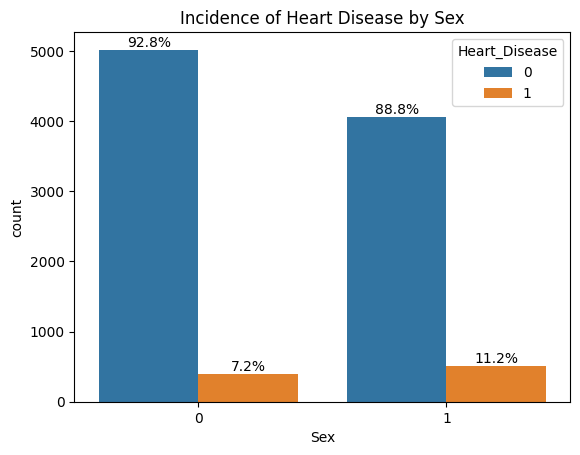

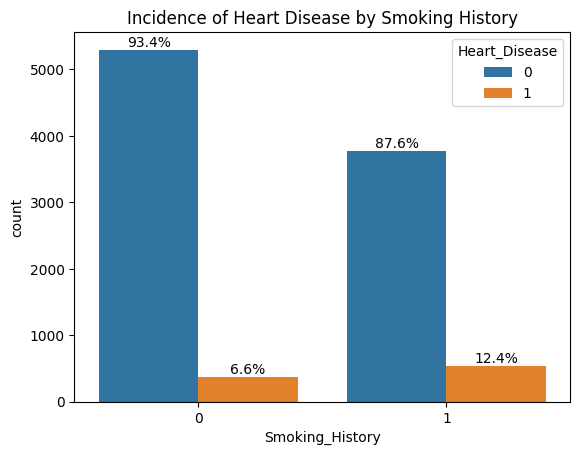

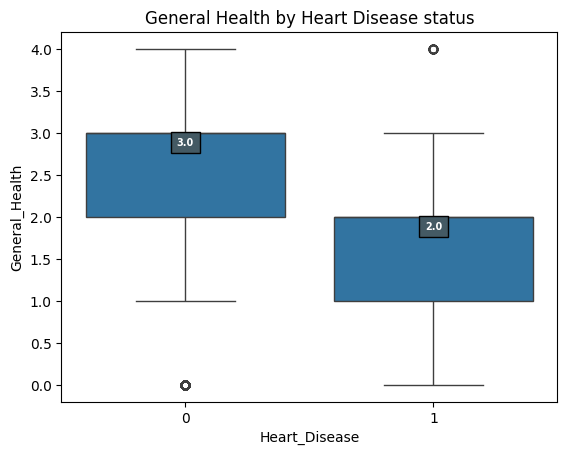

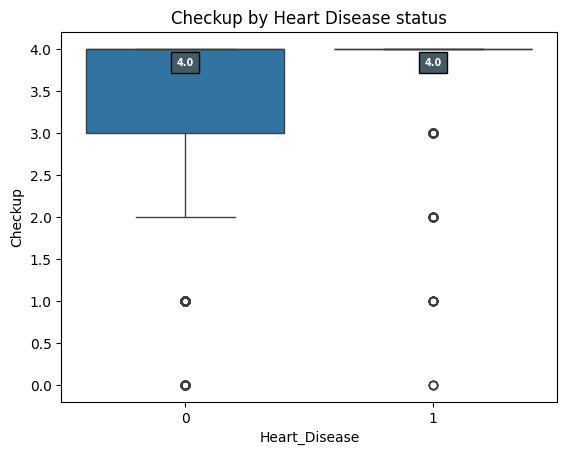

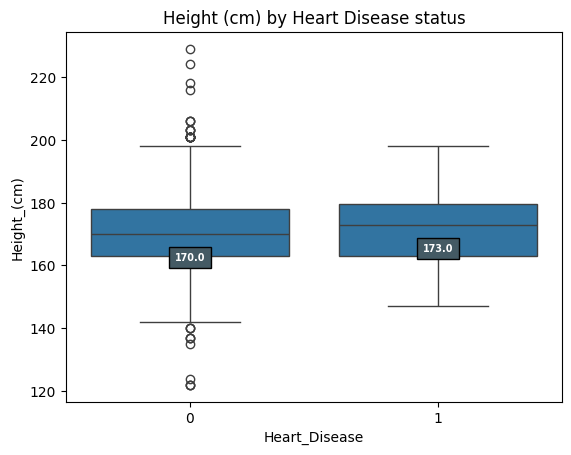

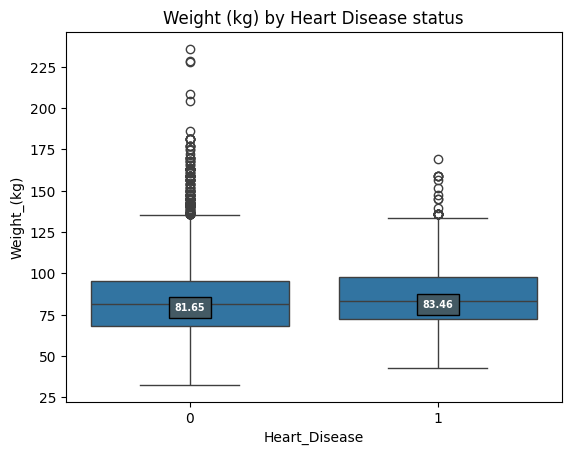

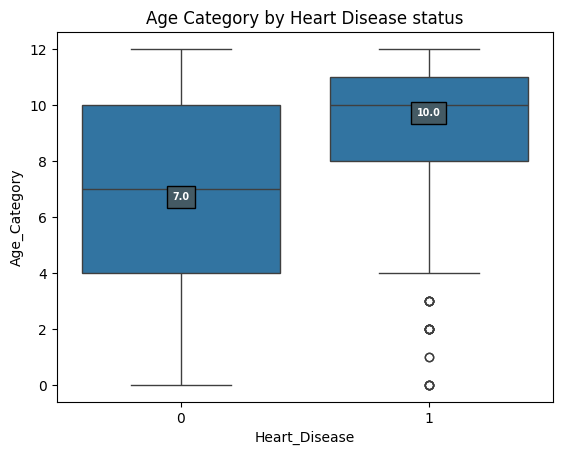

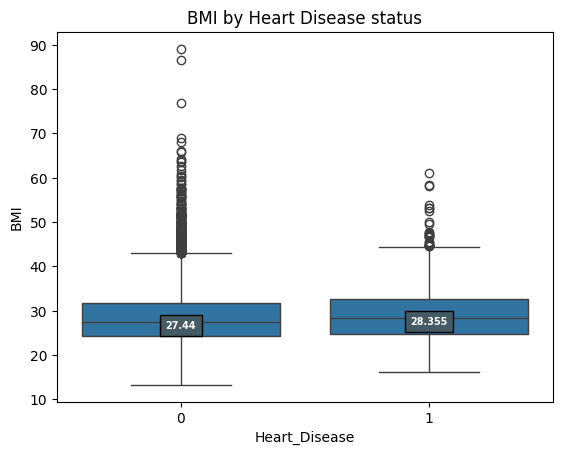

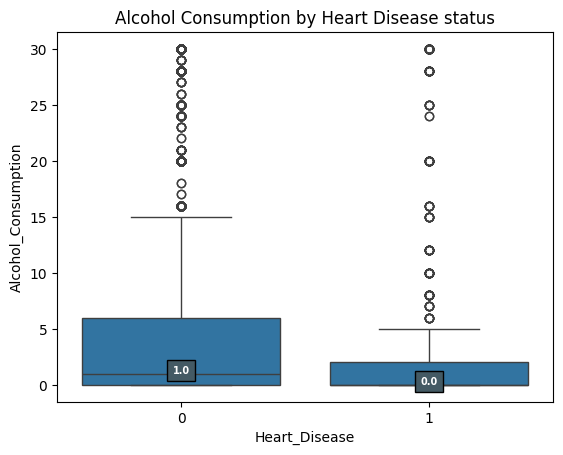

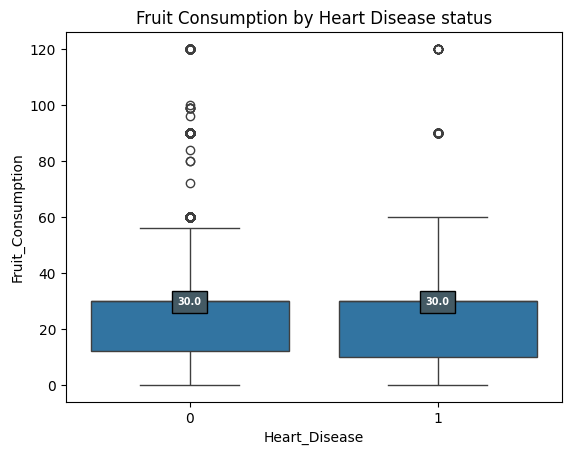

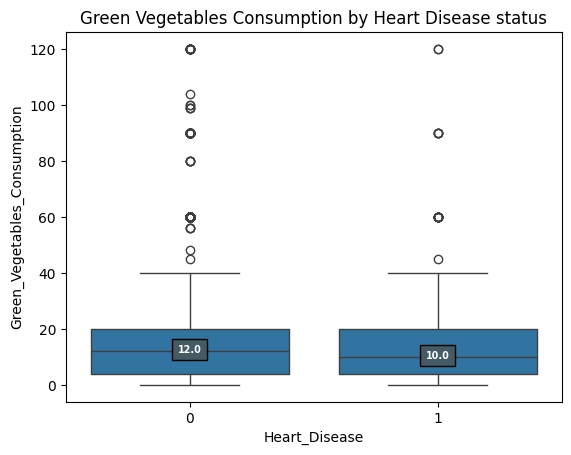

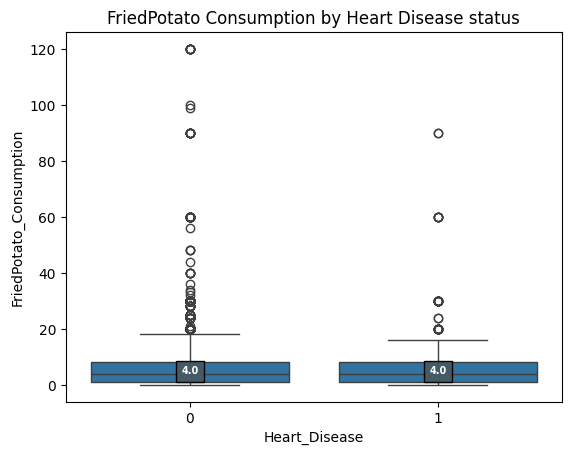

In [ ]:
from itertools import product
import matplotlib.patheffects as path_effects

#displaying categorical variables through count plots, and continuous variables through box plots
countplot_cols = ['General_Health','Checkup', 'Age_Category', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis','Sex', 'Smoking_History']
boxplot_cols = ['General_Health', 'Checkup', 'Height_(cm)', 'Weight_(kg)', 'Age_Category', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

#creating count plots for categorical variables
for i, column in enumerate(countplot_cols):
    ax = sns.countplot(x=column, hue = 'Heart_Disease', data=cvd_df2)
    groups = cvd_df2[column].unique()
    groups.sort()
    proportions = cvd_df2.groupby(column)['Heart_Disease'].value_counts(normalize=True)
    for c in ax.containers:
        labels = [f'{proportions.loc[g, ax.containers.index(c)]:.1%}' for g in groups]
        ax.bar_label(c, labels)
    ax.set_title(f'Incidence of Heart Disease by {column.replace("_", " ")}')
    plt.show()

#creating box plots for continuous variables
for i, column in enumerate(boxplot_cols):
    ax = sns.boxplot(x='Heart_Disease', y=column, data=cvd_df2)
    medians = cvd_df2.groupby(['Heart_Disease'])[column].median()
    vertical_offset = cvd_df2[column].median() * -0.05
    for xtick in ax.get_xticks():
        text = ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], horizontalalignment='center',
                       size='x-small',color='white',weight='semibold', bbox=dict(facecolor='#445A64'))
    ax.set_title(f'{column.replace("_", " ")} by Heart Disease status')
    plt.show()

Univariate Linear Regressions

In [ ]:
#Defining X and Y
X = cvd_df2.drop(columns=['Heart_Disease'])
y = cvd_df2['Heart_Disease']

In [ ]:
#Changing all values to have the same data tpye - converting all columns to integers

#First - checking the data tpyes in the data set shows that there are different tpyes, which is throwing an error.
print("Data types in X")
print(X.dtypes)
print("Data types in y")
print(y.dtypes)




Data types in X
General_Health                    int64
Checkup                           int64
Exercise                          int64
Skin_Cancer                       int64
Other_Cancer                      int64
Depression                        int64
Diabetes                          int64
Arthritis                         int64
Sex                               int64
Age_Category                      int64
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int64
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object
Data types in y
int64


In [ ]:
#Conducting univariate logistic regression using Logit over every independent variable
y_train = y

for column in X:
  X_train = sm.add_constant(cvd_df2[[column]])
  est = sm.Logit(y_train, X_train).fit()
  print(est.summary())

Optimization terminated successfully.
         Current function value: 0.278012
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:                 9980
Model:                          Logit   Df Residuals:                     9978
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Apr 2024   Pseudo R-squ.:                 0.08652
Time:                        19:50:11   Log-Likelihood:                -2774.6
converged:                       True   LL-Null:                       -3037.3
Covariance Type:            nonrobust   LLR p-value:                2.619e-116
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.7027      0.071     -9.873      0.000      -0.842      -0.563
General_Health   

Checking for correlation

In [ ]:
X.corr()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,1.000000,-0.101315,0.291585,-0.018078,-0.140204,-0.215730,-0.261799,-0.282046,0.033603,-0.167975,0.058691,-0.166671,-0.221396,-0.169273,0.106757,0.094589,0.127880,-0.019079
Checkup,-0.101315,1.000000,-0.047565,0.100830,0.093019,0.037536,0.141267,0.172475,-0.120620,0.226586,-0.100662,0.021802,0.078055,-0.043627,-0.036689,0.026280,0.014842,-0.047806
Exercise,0.291585,-0.047565,1.000000,-0.021728,-0.059842,-0.073357,-0.139965,-0.144058,0.073408,-0.140454,0.079479,-0.070070,-0.125857,-0.091392,0.084134,0.131232,0.136726,-0.024933
Skin_Cancer,-0.018078,0.100830,-0.021728,1.000000,0.146276,-0.000421,0.026362,0.140813,-0.007411,0.283432,-0.004911,-0.039343,-0.043347,0.027426,0.020319,0.014140,0.032488,-0.054317
Other_Cancer,-0.140204,0.093019,-0.059842,0.146276,1.000000,-0.002563,0.065661,0.128284,-0.053680,0.233300,-0.051852,-0.055691,-0.032801,0.027789,-0.008667,0.007526,-0.021363,-0.057425
Depression,-0.215730,0.037536,-0.073357,-0.000421,-0.002563,1.000000,0.059120,0.132208,-0.133151,-0.098523,-0.088788,0.048745,0.108769,0.104167,-0.021069,-0.044473,-0.046247,0.018148
Diabetes,-0.261799,0.141267,-0.139965,0.026362,0.065661,0.059120,1.000000,0.131012,-0.020653,0.178926,-0.040743,0.140805,0.182988,0.028462,-0.119675,-0.015824,-0.036788,-0.015600
Arthritis,-0.282046,0.172475,-0.144058,0.140813,0.128284,0.132208,0.131012,1.000000,-0.101869,0.358638,-0.105693,0.055800,0.120278,0.115773,-0.027521,-0.024100,-0.034231,-0.055605
Sex,0.033603,-0.120620,0.073408,-0.007411,-0.053680,-0.133151,-0.020653,-0.101869,1.000000,-0.068395,0.713336,0.333201,-0.023661,0.096381,0.135361,-0.068861,-0.035815,0.131279
Age_Category,-0.167975,0.226586,-0.140454,0.283432,0.233300,-0.098523,0.178926,0.358638,-0.068395,1.000000,-0.128280,-0.110954,-0.058587,0.095797,0.007813,0.030902,0.031277,-0.167527


Multivariate Linear Regression

In [ ]:
#Multivariate regression using every variable listed above

X = cvd_df2.drop(columns=['Heart_Disease'])
y = cvd_df2['Heart_Disease']

est_mv = sm.Logit(y,X).fit()
print(est_mv.summary())

Optimization terminated successfully.
         Current function value: 0.246542
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:                 9980
Model:                          Logit   Df Residuals:                     9962
Method:                           MLE   Df Model:                           17
Date:                Tue, 02 Apr 2024   Pseudo R-squ.:                  0.1899
Time:                        19:50:18   Log-Likelihood:                -2460.5
converged:                       True   LL-Null:                       -3037.3
Covariance Type:            nonrobust   LLR p-value:                1.110e-234
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
General_Health                  -0.5877      0.040    -14.569      0.000

In [ ]:
# Ran the regression outside of the collab (with the full csv data file) to find the significant variables:

# Significant Variables : General_Health, Checkup, Skin_Cancer, Other_Cancer, Depression, Diabetes, Arthritis, Sex,
#                         Age_Category, Height_(cm), Weight_(kg), BMI, Smoking_History, Alcohol_Consumption

# Insignificant Variables : Exercise, Fruit_Consumption, Green_Vegetables_Consumption, FriedPotato_Consumption



# Multivariate regression using only significant varialbes from the multivariate regression above

X = cvd_df2.drop(columns=['Heart_Disease', 'Exercise', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption'])
y = cvd_df2['Heart_Disease']

est_mv = sm.Logit(y,X).fit()
print(est_mv.summary())

Optimization terminated successfully.
         Current function value: 0.246622
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:                 9980
Model:                          Logit   Df Residuals:                     9966
Method:                           MLE   Df Model:                           13
Date:                Tue, 02 Apr 2024   Pseudo R-squ.:                  0.1897
Time:                        19:50:22   Log-Likelihood:                -2461.3
converged:                       True   LL-Null:                       -3037.3
Covariance Type:            nonrobust   LLR p-value:                3.553e-238
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
General_Health         -0.5945      0.039    -15.224      0.000      -0.671      -0.518
Ch

Cross Validation and Modeling

In [ ]:
print(est_mv.

TypeError: 'Logit' object is not callable